## Exercise 6: PCA


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

%matplotlib inline

In [2]:
df = pd.read_csv('data/players_20.csv')#Change path according to your files


### PCA

A common method for dimensionality reduction is the Principal Component Analysis, which is also known from the lecture:

https://en.wikipedia.org/wiki/Principal_component_analysis

Create scatter plots of the features 'Dribbling' and 'Ball control', then apply z-normalization to both features, and finally applying PCA to the normalized 2-d data (keep both dimensions after the transformation). 

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html#sklearn.preprocessing.scale

http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

What is the amount of variance explained by each of the selected components? 

What is the percentage of variance explained by the remining component, if we reduce the dimensionality of the 2-d dataset to 1-d with PCA?

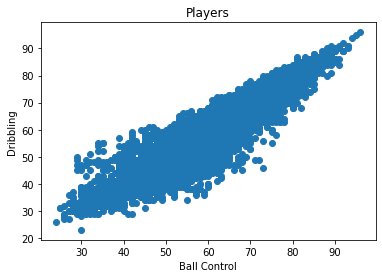

       principalComponent1  principalComponent2
0                -4.622923             0.020767
1                -3.857437             0.217833
2                -4.483117             0.018468
3                -4.343310             0.016169
4                -3.580123             0.353041
...                    ...                  ...
16237             4.042773             0.018039
16238             4.189476            -0.403679
16239             2.222991             0.187732
16240             2.085484             0.050225
16241             2.436149            -0.025426

[16242 rows x 2 columns]


variance explanation: 
[0.96054923 0.03945077]


After reducing dimesionality we loss
3.94507723355843
% data


In [78]:
#TODO: make scatter plots of the original normalized and the transformed data

# Generate ScatterPlot
df = df.dropna(subset=['dribbling', 'skill_ball_control'])

dribblingY = df['dribbling']
ballControlX = df['skill_ball_control']
newDf = df[['dribbling', 'skill_ball_control']]
plt.scatter(ballControlX, dribblingY)
plt.title('Players')
plt.xlabel('Ball Control')
plt.ylabel('Dribbling')
plt.show()

##applying z-score in both features
def z_score(df):
    df.columns = [x + "_zscore" for x in df.columns.tolist()]
    return ((df - df.mean())/df.std(ddof=0))

newDfWithZScore = z_score(newDf)
# newDfWithZScore

##applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(newDfWithZScore)

finalDf = pd.DataFrame(data = principalComponents
             , columns = ['principalComponent1', 'principalComponent2'])

print(finalDf)
print('\n')

##variance explained 
print('variance explanation: ')
explainedVariance = pca.explained_variance_ratio_
print(explainedVariance)
print('\n')


# What is the percentage of variance explained by the remining component, if we reduce the dimensionality of the 2-d dataset to 1-d with PCA?

def valueLossPercentage(data):
    response =  (data.min() / np.sum(data)) * 100
    return response

result = valueLossPercentage(explainedVariance)

print('After reducing dimesionality we loss')
print(result)


In [ ]:
# TODO: output the amount of explained variance of each component and remining variance after dimensionality reduction
